## Trabalho Computacional I
___
### Projeto 2: Butterworth por Transformação Bilinear
ENGC63 - 2023.1

Discentes: Gabriel S. de Andrade e Fábio Braga

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import read, write
from IPython.display import display, Math, Audio


In [25]:
N = 6
fs = 44100
wc = 2 * np.pi / 3
T = 1 / fs
fc = round(wc * fs / (2 * np.pi))
Wc = 2 * np.pi * fc

print(f"Ordem do filtro: {N}")
print(f"Frequência de corte: {fc} Hz")
print(f"Frequência angular de corte: {Wc} rad/s")
print(f"Período de amostragem: {T} s")
print(f"Frequência de amostragem: {fs} Hz")
print(f"Amostras por período: {fs/fc}")

# Design analog Butterworth filter using signal.butter function
b, a = signal.butter(N, Wc, "lowpass", analog="True", output="ba")
analog_filter = signal.lti(b, a)

# print(f"Coeficientes do filtro analógico: {a}, {b}")

# Perform bilinear Transformation
discrete_filter = signal.dlti(*signal.bilinear(b, a, fs=fs))

# Compute frequency response of the filter using signal.freqz function
wz, hz = signal.freqz(discrete_filter.num, discrete_filter.den, worN=fs)
ws, hs = signal.freqs(analog_filter.num, analog_filter.den, worN=fs * wz)

Ordem do filtro: 6
Frequência de corte: 14700 Hz
Frequência angular de corte: 92362.82401553991 rad/s
Período de amostragem: 2.2675736961451248e-05 s
Frequência de amostragem: 44100 Hz
Amostras por período: 3.0


### Polos do filtro digital

Polos do filtro digital: [-0.03661765+0.7666792j  -0.03661765-0.7666792j  -0.02700781+0.41395565j
 -0.02700781-0.41395565j -0.02345409+0.13158131j -0.02345409-0.13158131j]

Zeros do filtro digital: [-1.00295559+0.00171527j -1.00295559-0.00171527j -0.99998464+0.00340396j
 -0.99998464-0.00340396j -0.99705977+0.00168867j -0.99705977-0.00168867j]


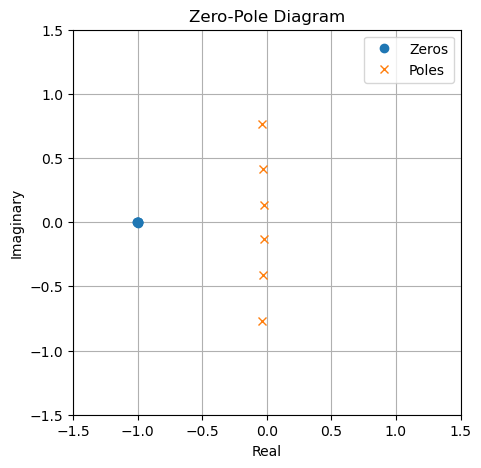

In [36]:
# pensei em plotar isso pois o professor comentou que os polos e zeros do filtro ficam no semiplano esquerdo
# podemos argumentar algo em relação a isso na apresentação
print(f"Polos do filtro digital: {discrete_filter.poles}\n")
print(f"Zeros do filtro digital: {discrete_filter.zeros}")

# Plot the zero-pole diagram
plt.figure(figsize=(5, 5))
plt.plot(discrete_filter.zeros.real, discrete_filter.zeros.imag, "o", label="Zeros")
plt.plot(discrete_filter.poles.real, discrete_filter.poles.imag, "x", label="Poles")
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.legend()
plt.grid()
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.title("Zero-Pole Diagram")
plt.show()

In [27]:
# Calculate Magnitude from hs and hz in dB
analog_mag = 20 * np.log10(abs(hs))
discreet_mag = 20 * np.log10(abs(hz))

# Calculate frequency in Hz from wz
freq = wz * fs / (2 * np.pi)

Amplitude na frequência de corte: -3.010299956639825 dB


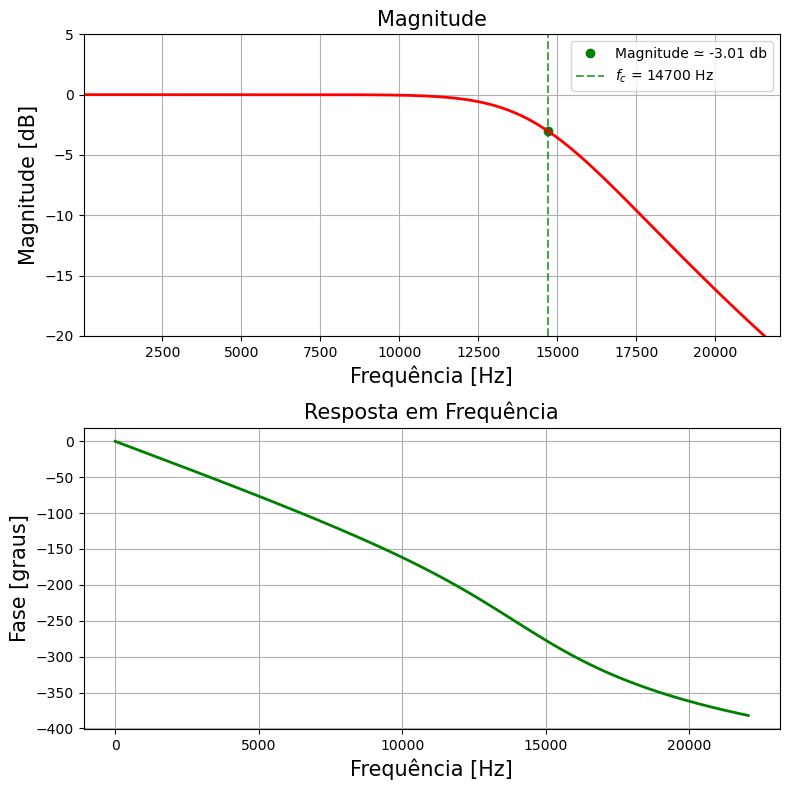

In [34]:
value_at_fc = analog_mag[round(fc / (freq[1] - freq[0]))]
print(f"Amplitude na frequência de corte: {value_at_fc} dB")


# Plot magnitude
fig = plt.figure(figsize=(8, 8))
sub1 = plt.subplot(2, 1, 1)
sub1.plot(fc, value_at_fc, "go", label=f"Magnitude ≃ {round(value_at_fc, 2)} db")
plt.axvline(
    x=fc, color="green", ls="--", label="$f_c$ = {} Hz".format(round(fc)), alpha=0.7
)
sub1.plot(freq, analog_mag, "r", linewidth=2)
sub1.axis([1, fs / 2, -20, 5])
sub1.set_title("Magnitude", fontsize=15)
sub1.set_xlabel("Frequência [Hz]", fontsize=15)
sub1.set_ylabel("Magnitude [dB]", fontsize=15)
plt.legend()
sub1.grid()


# Plot phase angle
sub2 = plt.subplot(2, 1, 2)

# Calculate phase angle in degree from hz
Phase = np.unwrap(np.angle(hs)) * 180 / np.pi
sub2.plot(freq, Phase, "g", linewidth=2)
sub2.set_ylabel("Fase [graus]", fontsize=15)
sub2.set_xlabel(r"Frequência [Hz]", fontsize=15)
sub2.set_title(r"Resposta em Frequência", fontsize=15)
sub2.grid()

plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

Amplitude na frequência de corte: -26.234189751596514 dB


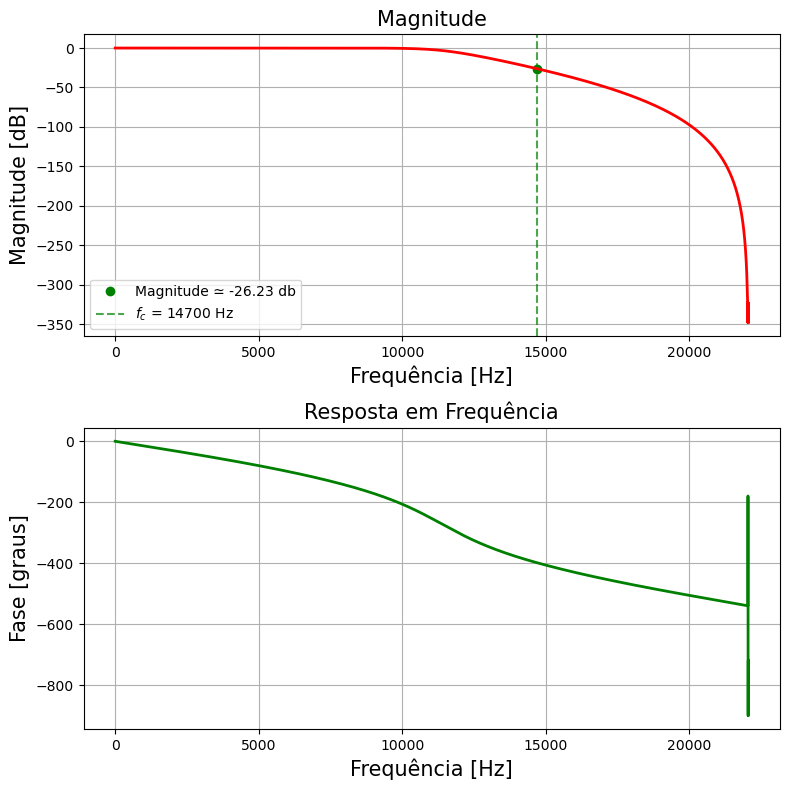

In [35]:
value_at_fc = discreet_mag[round(fc / (freq[1] - freq[0]))]
print(f"Amplitude na frequência de corte: {value_at_fc} dB")

# Plot magnitude
fig = plt.figure(figsize=(8, 8))
sub1 = plt.subplot(2, 1, 1)
sub1.plot(fc, value_at_fc, "go", label=f"Magnitude ≃ {round(value_at_fc, 2)} db")
plt.axvline(
    x=fc, color="green", ls="--", label="$f_c$ = {} Hz".format(round(fc)), alpha=0.7
)
plt.legend()
sub1.plot(freq, discreet_mag, "r", linewidth=2)
# sub1.axis([1, fs/2, -100, 10])
sub1.set_title("Magnitude", fontsize=15)
sub1.set_xlabel("Frequência [Hz]", fontsize=15)
sub1.set_ylabel("Magnitude [dB]", fontsize=15)
sub1.grid()

# Plot phase angle
sub2 = plt.subplot(2, 1, 2)

# Calculate phase angle in degree from hz
Phase = np.unwrap(np.angle(hz)) * 180 / np.pi
sub2.plot(freq, Phase, "g", linewidth=2)
sub2.set_ylabel("Fase [graus]", fontsize=15)
sub2.set_xlabel(r"Frequência [Hz]", fontsize=15)
sub2.set_title(r"Resposta em Frequência", fontsize=15)
sub2.grid()

plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()